In [1]:
import os,sys
import numpy as np
import pickle
import pylab as pl
import Lx_ModuleMapping as minfo
import triangle_mapping_Lx as tri
import histogram as hist
import shutil
# inputs

module = 'H10'
date = '20240416'
run = '%s_BA4_H10'%date
im = 1
inpath = 'outputs/'
fn = 'dpdt_results.txt'

cmap = 'jet'
testbed = 'BA'
infile = inpath + fn
d = pickle.load(open(infile,'rb'))

# output
outpath = inpath+"tile_plots/"
if not os.path.isdir(outpath):
    os.makedirs(outpath)

#rnti = np.full((24, 41), float('nan'))
#dpdt = np.full((24, 41), float('nan'))
rnti = np.array([[np.nan for i2 in range(41)] for i1 in range(24)])
dpdt = np.array([[np.nan for i2 in range(41)] for i1 in range(24)])
dpdt_loss = np.array([[np.nan for i2 in range(41)] for i1 in range(24)])
dpdt_dark = np.array([[np.nan for i2 in range(41)] for i1 in range(24)])
psat300 = np.array([[np.nan for i2 in range(41)] for i1 in range(24)])
psat077 = np.array([[np.nan for i2 in range(41)] for i1 in range(24)])

PTilow= np.array([[np.nan for i2 in range(41)] for i1 in range(24)])
PTihigh= np.array([[np.nan for i2 in range(41)] for i1 in range(24)])
PTiempirical= np.array([[np.nan for i2 in range(41)] for i1 in range(24)])

detmap = np.array([[0 for i2 in range(41)] for i1 in range(24)])
curv = np.array([[0 for i2 in range(41)] for i1 in range(24)])

Loss_arr = np.array([0 for i2 in range(4)])
Loss_mtx = np.zeros([2,2])

darkcolrow = [(13,0), (14,0), (1,0), (2,0), (11,2), (11,1), (5,0), (6,0)]

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
for col in range(16):
    for row in range(41):
        try:
            rnti[col, row] = d['rnti'][col+(im*16)][row]
            #subtraction in line below subtracts the mean dark value from the data 
            dpdt[col, row] = d['dpdt'][col+(im*16)][row] - 0.02 # correction for direct stimulation # what's subtracted should be the value for darks
            dpdt_dark[col, row] = d['dpdt_dark'][col+(im*16)][row]
            dpdt_loss[col, row] = np.nan

            psat300[col, row] = d['psat300'][col+(im*16)][row]
            
            psat077[col, row] = d['psat077'][col+(im*16)][row]
            
            PTilow[col, row] = d['PTilow'][col+(im*16)][row]
            PTihigh[col, row] = d['PTihigh'][col+(im*16)][row]
            PTiempirical[col, row] = d['PTiempirical'][col+(im*16)][row]
            
            if (col,row) in darkcolrow:
                detmap[col,row] = -1
            elif (col,row) in losscolrow:
                detmap[col,row] = 1
        except:
            continue
mask = ~(dpdt_dark == 0)            
print(np.nanmean(dpdt_dark[mask]))

if(testbed) == 'SK':
        np.roll(rnti,1,axis=1)
        np.roll(dpdt,1,axis=1)
        np.roll(dpdt_dark,1,axis=1)
        np.roll(psat300,1,axis=1)
        np.roll(psat077,1,axis=1)
        np.roll(PTilow,1,axis=1)
        np.roll(PTihigh,1,axis=1)
        np.roll(PTiempirical,1,axis=1)
        np.roll(dpdt_loss,1,axis=1)


0.018642764656127905


outputs/tile_plots/H10_dpdt_hist.png
outputs/tile_plots/H10_dpdt.png
outputs/tile_plots/H10_rnti_hist.png
outputs/tile_plots/H10_rnti.png


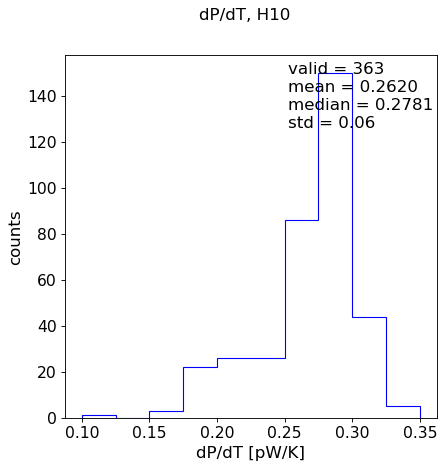

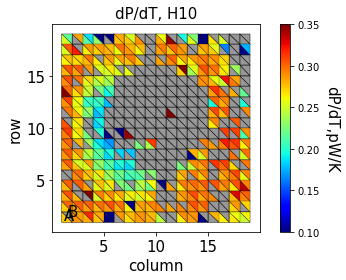

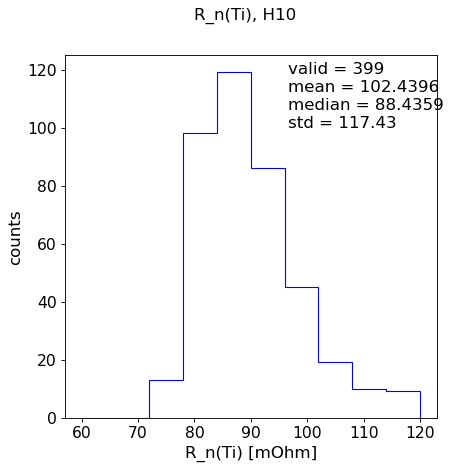

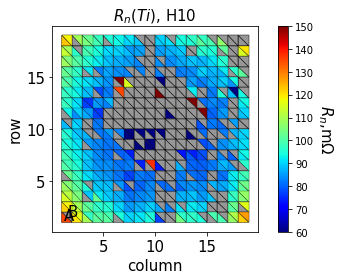

In [3]:

hist.plot_1Dhist((dpdt[0:16,:]), outpath, '%s_dpdt_hist'%module,
		maintitle='dP/dT, %s'%module,
		xlabel='dP/dT',
		xunit='pW/K',
		binrange=[0.1, 0.35])


tri.triange_mapping_single(dpdt, itile = 0,
                        vmin = 0.1,
                        vmax = 0.35,
                        vari = r'dP/dT',
                        unit = r'pW/K',
                        outpath = outpath + '%s_dpdt.png'%module,
                        mask_wire = None,
                        maintitle= r'dP/dT, %s'%module,
                        cmap = cmap)


hist.plot_1Dhist((rnti[0:16,:]), outpath, '%s_rnti_hist'%module,
		maintitle='R_n(Ti), %s'%module,
		xlabel='R_n(Ti)',
		xunit='mOhm',
		binrange=[60, 120.])


tri.triange_mapping_single(rnti, itile = 0,
			vmin = 60,
			vmax = 150.,
			vari = r'$R_n$',
			unit = r'm$\Omega$',
			outpath = outpath + '%s_rnti.png'%module,
			mask_wire = None,
			maintitle= r'$R_n(Ti)$, %s'%module,
			cmap = cmap)

outputs/tile_plots/H10_psat300_hist.png
outputs/tile_plots/H10_psat300.png
outputs/tile_plots/H10_psat077_hist.png
outputs/tile_plots/H10_psat077.png
outputs/tile_plots/H10_dpdt_dark_hist.png
outputs/tile_plots/H10_dpdt_dark.png


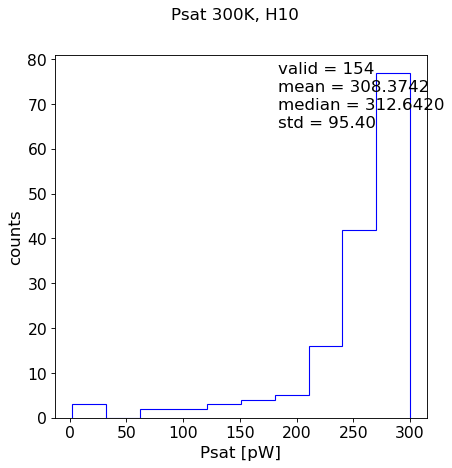

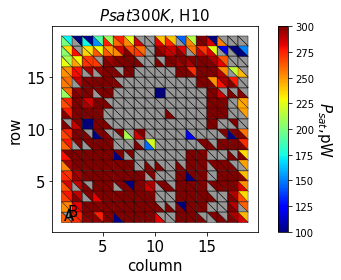

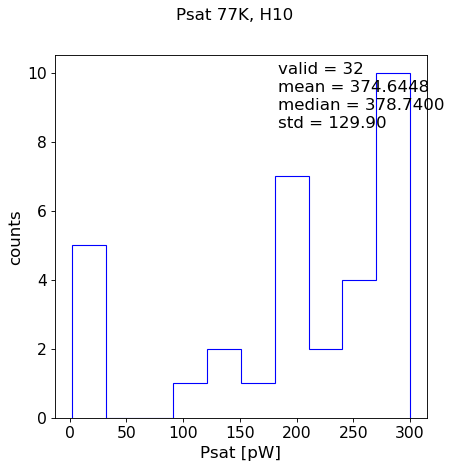

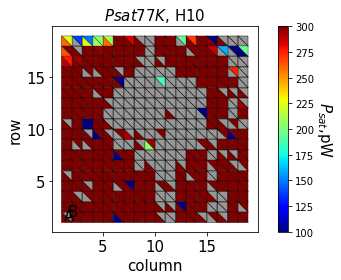

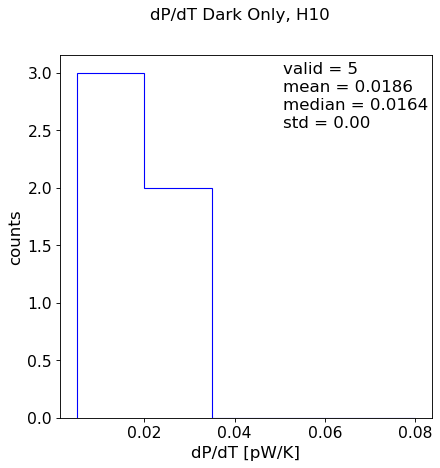

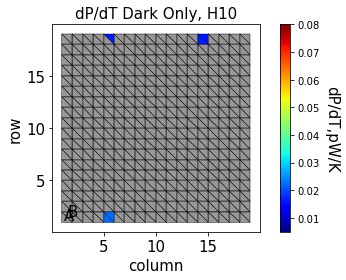

In [4]:
hist.plot_1Dhist((psat300[0:16,:]), outpath, '%s_psat300_hist'%module,
		maintitle='Psat 300K, %s'%module,
		xlabel='Psat',
		xunit='pW',
		binrange=[2, 300])

tri.triange_mapping_single(psat300, itile = 0,
			vmin = 100,
			vmax = 300,
			vari = r'$P_{sat}$',
			unit = r'pW',
			outpath = outpath + '%s_psat300.png'%module,
			mask_wire = None,
			maintitle= r'$Psat 300K$, %s'%module,
			cmap = cmap)


hist.plot_1Dhist((psat077[0:16,:]), outpath, '%s_psat077_hist'%module,
		maintitle='Psat 77K, %s'%module,
		xlabel='Psat',
		xunit='pW',
		binrange=[2, 300])

tri.triange_mapping_single(psat077, itile = 0,
			vmin = 100,
			vmax = 300,
			vari = r'$P_{sat}$',
			unit = r'pW',
			outpath = outpath + '%s_psat077.png'%module,
			mask_wire = None,
			maintitle= r'$Psat 77K$, %s'%module,
			cmap = cmap)


#Plot Dark

dpdt_dark[np.where(dpdt_dark == 0)] = np.nan

hist.plot_1Dhist((dpdt_dark[0:16,:]), outpath, '%s_dpdt_dark_hist'%module,
		maintitle='dP/dT Dark Only, %s'%module,
		xlabel='dP/dT',
		xunit='pW/K',
        nbins=5,
		binrange=[.005, 0.08])



tri.triange_mapping_single(dpdt_dark, itile = 0,
                        vmin = 0.005,
                        vmax = 0.08,
                        vari = r'dP/dT',
                        unit = r'pW/K',
                        outpath = outpath + '%s_dpdt_dark.png'%module,
                        mask_wire = None,
                        maintitle= r'dP/dT Dark Only, %s'%module,
                        cmap = cmap)